In [ ]:
pip install isacalc

  Preparing metadata (setup.py) ... done
  Created wheel for isacalc: filename=isacalc-1.3.4-py3-none-any.whl size=41069 sha256=1f86c3078b0f405c301e013689d805462a3b11e275df0bdb6d4875391b74dd83
  Stored in directory: /root/.cache/pip/wheels/80/3c/c6/5da7b11537fd4db524673d8525e60318763ff17bdec597cf1f
Successfully built isacalc


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import isacalc as isa
import pandas as pd

In [ ]:
# Install TeX Live
!apt-get update
!apt-get install -y texlive-latex-recommended texlive-latex-extra texlive-fonts-recommended texlive-fonts-extra
!apt-get update -qq
!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended texlive-fonts-extra dvipng ghostscript cm-super


Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64

In [ ]:
# Calcular coordenadas devido ao diedro da asa
diedro = 7 # Diedro (graus)
b = 15.33 # Envergadura

y = np.array([4.8475,7.4889,7.665])

z = y * np.tan(np.deg2rad(diedro))

print(z)

[0.59519816 0.9195213  0.94114366]


In [ ]:
# Parametros geometricos medidos no AUTOCAD e Manual
ct = 1.32
area = 29
cr = 2.42
b = 15.33
cma = 1.94
afil = ct/cr
AR = b**2/area
g = 9.78
enflechamento_25 = np.deg2rad(19/60+48/3600)

enflechamento_LE = np.atan(np.tan(enflechamento_25)+(1-afil)/(AR*(1+afil)))

# Calculo da posicao do LE da CMA e da posicao do CG para diferentes casos

x_cma = b/6 * ((1+2*afil)/(1+afil)) * np.tan(enflechamento_LE)

cg_caso1 = x_cma + 0.25 * cma
cg_caso2 = x_cma + 0.15 * cma
cg_caso3 = x_cma + 0.34 * cma
print(f'Posição do CG para Caso 1 25%: {cg_caso1}')
print(f'Posição do CG para Caso 2 15%: {cg_caso2}\n')
print(f'Posição do CG para Caso 3 34%:{cg_caso3}\n')
# Coordenadas do bordo de ataque da asa:

x_asa = np.tan(enflechamento_LE) * np.array([0,4.8475,7.4889,7.665])
x_asa1 = np.tan(enflechamento_25) *np.array([0,4.8475,7.4889,7.665])

print(f'Enflechamento do bordo de ataque: {enflechamento_LE*180/pi}')


print(f'Coordenadas X do bordo de ataque da asa: {x_asa}\n ')


# Número de Reynolds em cruzeiro:



V_cru = 118.322
atmosfera = isa.Atmosphere(g0=g)
params = atmosfera.calculate(h=3048)
h = params[0]
T = params[1]
P = params[2]
rho = params[3]
a = params[4]
mu = params[5]
print(f'Velocidade de cruzeiro: {V_cru}')
print(f'Altitude: {params[0]}')
print(f'Temperatura: {params[1]}')
print(f'Pressão: {params[2]}')
print(f'Densidade do ar: {params[3]}')
print(f'Velocidade do Som: {params[4]}')
print(f'Viscosidade Dinâmica: {params[5]}')


cordas = np.array([2.42,1.73,1.3455,1.32])
cordas_profundor = np.array([1.6,1.0016])
cordas_leme = np.array([2.0254,1.1571])

Re = rho* V_cru * cordas / mu
Re2 = rho* V_cru * cordas_leme / mu
Re3 = rho* V_cru * cordas_profundor / mu
print(f'Reynolds da asa: {Re}\n')
print(f'Reynolds das cordas do leme: {Re2}\n')
print(f'Reynolds das cordas do profundor: {Re3}\n')
# Inércia

l_f = 13.741

massas = np.array([4054,4600,5000])
peso = massas * g
Rx = 0.34
Ry = 0.29
Rz = 0.44

Ixx = (b**2)*peso*(Rx**2)/(4*g)

Iyy = l_f**2*peso*Ry**2/(4*g)

Izz = (0.5 * (b+l_f))**2 * peso * Rz**2/(4*g)


for i in range(len(massas)):
  print(f'Peso da {i+1}ª carga: {massas[i]}')
  print(f'Inércias: Ixx = {Ixx[i]}, Iyy = {Iyy[i]}, Izz = {Izz[i]}')
  print(f'Input do avl:')
  print(f'{massas[i]} {cg_caso1:.2f} 0.0 0.0 {Ixx[i]:.4f} {Iyy[i]:.4f} {Izz[i]:.4f}')
  print(f'\n')

Posição do CG para Caso 1 25%: 0.6303695554187749
Posição do CG para Caso 2 15%: 0.436369555418775

Posição do CG para Caso 3 34%:0.804969555418775

Enflechamento do bordo de ataque: 2.4080774654167008
Coordenadas X do bordo de ataque da asa: [0.         0.20385504 0.31493554 0.32234119]
 
Velocidade de cruzeiro: 118.322
Altitude: 3048.0
Temperatura: 268.33799999999997
Pressão: 69747.77688817716
Densidade do ar: 0.9054954894827355
Velocidade do Som: 328.3568309019929
Viscosidade Dinâmica: 1.692083730228864e-05
Reynolds da asa: [15323053.20652457 10954083.49061467  8519490.9460243   8358029.02174067]

Reynolds das cordas do leme: [12824509.07623754  7326572.25837586]

Reynolds das cordas do profundor: [10130944.26877657  6341971.11225414]

Peso da 1ª carga: 4054
Inércias: Ixx = 27533.783729340004, Iyy = 16093.719514313347, Izz = 41456.15857938939
Input do avl:
4054 0.63 0.0 0.0 27533.7837 16093.7195 41456.1586


Peso da 2ª carga: 4600
Inércias: Ixx = 31242.08316600001, Iyy = 18261.25055

In [ ]:
#calculando velocidades de estol:

velocidade_indicada = np.array([81,85])
velocidade_calibrada = np.array([83.2,86.42])
fator_calibração = np.gradient(velocidade_indicada,velocidade_calibrada)
velocidade_real = velocidade_calibrada * np.sqrt(atmosfera.calculate(h=0)[3] / rho)*0.514444

# Estimando Clmax:

CLmax_5000kg = 2*5000*g/(rho*area*velocidade_real[0]**2)
CLmax_4600kg = 2*4600*g/(rho*area*velocidade_real[1]**2)

print(f'Clmax para 5000kg: {CLmax_5000kg}')
print(f'Clmax para 4600kg: {CLmax_4600kg}\n')


print(f'Velocidade real em m/s: {velocidade_real} ')

print(f'Estimativa de velocidade de estol para 6000 kg: {np.sqrt(2*6000*g/(rho*area*(CLmax_5000kg)))}\n')

print(f'Velocidade de cruzeiro em m/s: {230*0.514444}')

print(f'Fator de calibração: {fator_calibração[0]}')

print(f'Estol para MTOW: {91*fator_calibração[0]*np.sqrt(atmosfera.calculate(h=0)[3] / rho)*0.514444}')

Clmax para 5000kg: 1.5027332741654276
Clmax para 4600kg: 1.2814092622604945

Velocidade real em m/s: [49.78360376 51.71032497] 
Estimativa de velocidade de estol para 6000 kg: 54.53520554991567

Velocidade de cruzeiro em m/s: 118.32212
Fator de calibração: 1.2422360248447208
Estol para MTOW: 67.64076598249491


Velocidades:
 [ 55.  62.  69.  76.  83.  90.  97. 104. 111. 118.]
Coeficientes de sustentação:
[1.223  0.9623 0.777  0.6404 0.537  0.4567 0.3932 0.342  0.3002 0.2657]


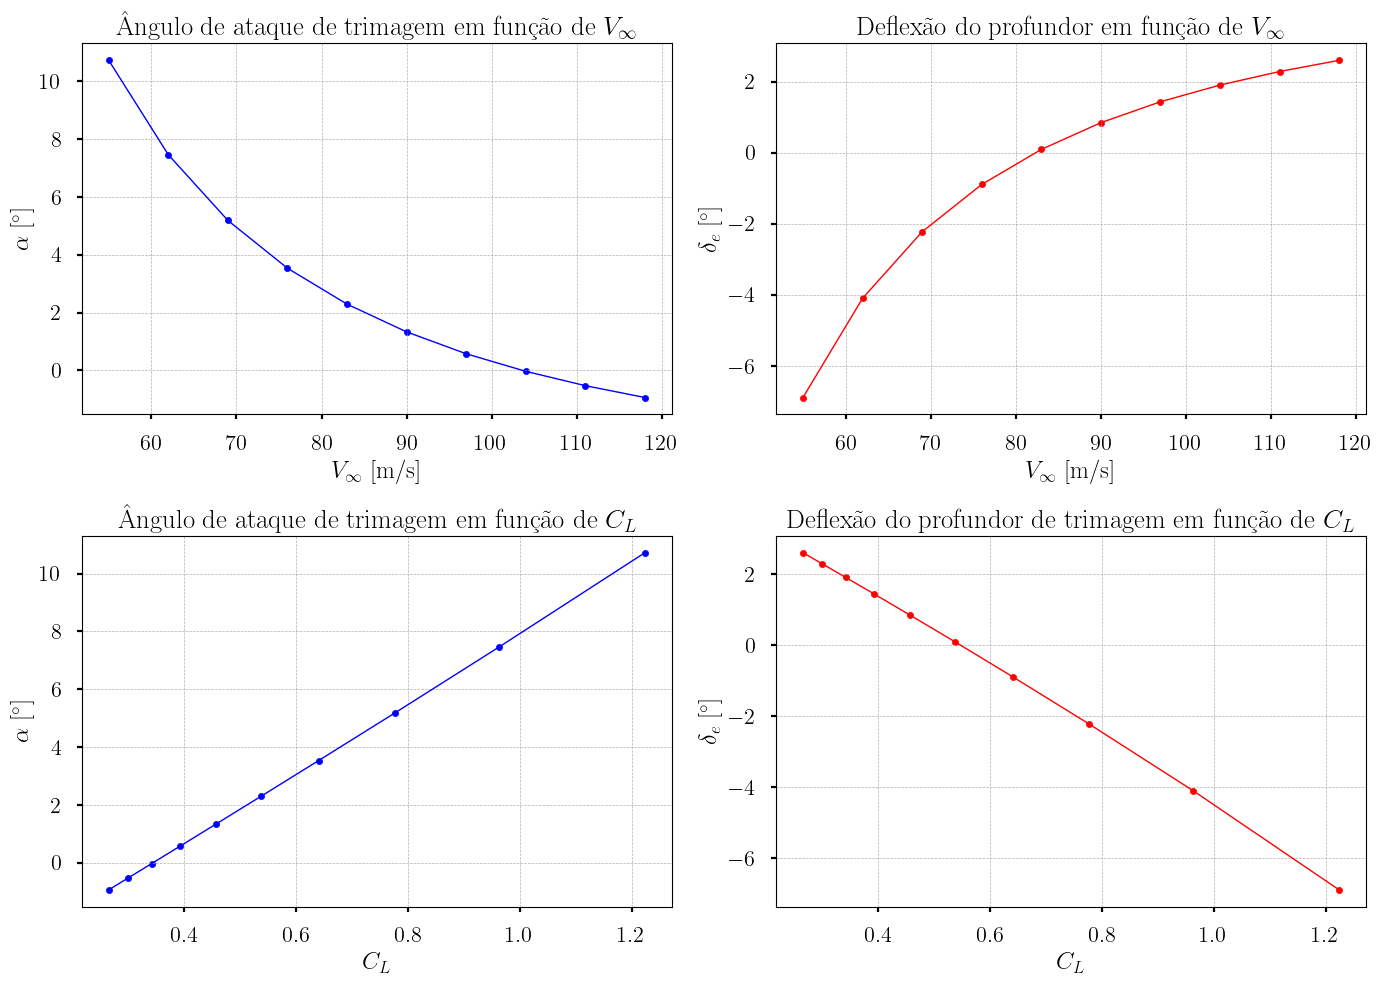

In [ ]:
# Graficos de comparacao para trimagem:

# Dados:

velocidades = np.linspace(55,118,10)
alfa_V = np.array([10.72118,7.45632,5.18528,3.53346,2.29126,1.3322,0.57566,-0.03196,-0.52749,-0.937])
profundor_V = np.array([-6.89234,-4.10061,-2.22664,-0.8943,0.09224,0.8455,1.43483,1.90518,2.28687,2.60107])

CL = np.array([1.223,0.9623,0.777,0.6404,0.5370,0.4567,0.3932,0.3420,0.3002,0.2657])
print(f'Velocidades:\n {velocidades}')
print(f'Coeficientes de sustentação:\n{CL}')
alfa_CL = alfa_V
profundor_CL = profundor_V
#----------Alfa x V----------------
plt.rcdefaults()
plt.style.use('seaborn-v0_8-poster')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
(ax1, ax2), (ax3, ax4) = axes

# -------- Alfa x V --------
ax1.scatter(velocidades, alfa_V, color='b', s=20)
ax1.plot(velocidades, alfa_V, color='b', linewidth=1)
ax1.set_title(r'Ângulo de ataque de trimagem em função de $V_{\infty}$')
ax1.set_xlabel(r'$V_{\infty}$ [m/s]')
ax1.set_ylabel(r'$\alpha$ [$^\circ$]')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# -------- Delta e x V --------
ax2.scatter(velocidades, profundor_V, color='r', s=20)
ax2.plot(velocidades, profundor_V, color='r', linewidth=1)
ax2.set_title(r'Deflexão do profundor em função de $V_{\infty}$')
ax2.set_xlabel(r'$V_{\infty}$ [m/s]')
ax2.set_ylabel(r'$\delta_e$ [$^\circ$]')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# -------- Alfa x CL --------
ax3.scatter(CL, alfa_CL, color='b', s=20)
ax3.plot(CL, alfa_CL, color='b', linewidth=1)
ax3.set_title(r'Ângulo de ataque de trimagem em função de $C_L$')
ax3.set_xlabel(r'$C_L$')
ax3.set_ylabel(r'$\alpha$ [$^\circ$]')
ax3.grid(True, which='both', linestyle='--', linewidth=0.5)

# -------- Delta e x CL --------
ax4.scatter(CL, profundor_CL, color='r', s=20)
ax4.plot(CL, profundor_CL, color='r', linewidth=1)
ax4.set_title(r'Deflexão do profundor de trimagem em função de $C_L$')
ax4.set_xlabel(r'$C_L$')
ax4.set_ylabel(r'$\delta_e$ [$^\circ$]')
ax4.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [ ]:
class AnaliseAerodinamica:
    def __init__(self):

        # Dicionário para guardar os DataFrames de cada análise
        self.dados = {}
        # Dicionário para guardar os nomes dos perfis
        self.perfis = {}
        self.CP = {}

    def get_nome_perfil(self,arquivo_atual):
      aifoil_name = input(f'Insira o nome do aerofolio correspondente ao arquivo:\n {arquivo_atual}\n')
      return aifoil_name

    #----------Método para plotar os gráficos de CL,CD....----------
    def plotGraficos(self,arquivos_list):
        # Dicionário temporário para guardar os DataFrames de cada análise dentro deste método
        dados_temporarios = {}

        # ----------Le o cada arquivo da lista com os dados do XFoil----------
        for arquivo in arquivos_list:
            df = pd.read_csv(arquivo, skiprows=9, sep=r'\s+', header=0)

            #----------Remove a primeira linha e converte para float----------
            df = df.iloc[1:].astype(float)
            df['CL/CD'] = df['CL'] / df['CD']

            # Obtém o nome do perfil e armazena
            nome_perfil = self.get_nome_perfil(arquivo)
            self.perfis[arquivo] = nome_perfil

            # Armazena o DataFrame no dicionário temporário usando o nome do perfil como chave
            dados_temporarios[nome_perfil] = df

        # Atualiza o atributo da classe com os dados lidos
        self.dados = dados_temporarios

        # Compilador latex
        plt.rcdefaults()
        plt.style.use('seaborn-v0_8-poster')
        plt.rcParams.update({
            "text.usetex": True,
            "font.family": "serif",
            "font.serif": ["Computer Modern Roman"],
            "font.size": 12
        })

        # Pega as colunas para plotar (excluindo 'alpha', 'Top_Xtr' e 'Bot_Xtr')
        # Verifica se self.dados não está vazio antes de acessar as colunas
        if not self.dados:
            print("Nenhum dado carregado para plotar os gráficos.")
            return

        # Plotar CL vs CD em um único gráfico
        fig_CL_CD, ax_CL_CD = plt.subplots(figsize=(12, 7))
        ax_CL_CD.set_title('$C_L$ vs $C_D$ para diferentes aerofólios')
        ax_CL_CD.set_xlabel('$C_D$')
        ax_CL_CD.set_ylabel('$C_L$')

        for perfil, df_perfil in self.dados.items():
            ax_CL_CD.plot(df_perfil['CD'], df_perfil['CL'], label=perfil, linestyle='-', linewidth=2)

        ax_CL_CD.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax_CL_CD.legend(loc='best')
        ax_CL_CD.axhline(y=0, color='k', linewidth=0.8)
        ax_CL_CD.axvline(x=0, color='k', linewidth=0.8)
        plt.show()

        # Para cada perfil, imprimir a derivada (média) CL_alfa e CL_af
        for perfil, df_perfil in self.dados.items():
            # Certifique-se de que 'alpha' está em radianos para np.gradient se 'df_perfil['alpha']' estiver em graus
            # Se 'df_perfil['alpha']' já estiver em graus, converta apenas o resultado final ou use graus diretamente
            # Assumindo que alpha está em graus e precisamos da derivada em relação a alpha em radianos para CL_alfa (por radiano)
            # Ou, se CL_alfa deve ser por grau, use diretamente os graus.
            # O código original parece estar calculando por grau e multiplicando por (180/pi) para converter.
            # Vamos manter a lógica original para consistência, mas com 'df_perfil' específico.
            cl_alfa_gradient = np.gradient(df_perfil['CL'], df_perfil['alpha'])
            cl_alfa_mean = np.mean(cl_alfa_gradient) * (180 / pi) # Convertendo para por grau

            print(f'Derivada (média) CL_alfa do perfil {perfil}: {cl_alfa_mean}')
            print(f'CL_af do perfil {perfil}: {cl_alfa_mean / (2 * pi)}')


In [ ]:
graficos = AnaliseAerodinamica()

#graficos.plotGraficos(["/content/ponta_asa.txt",
                   #    "/content/raiz_asa.txt",
                   #    "/content/ponta_profundor.txt",
                   #    "/content/raiz_profundor.txt",
                   #    '/content/ponta_leme.txt',
                   #    '/content/raiz_leme.txt'])
#

In [ ]:
#graficos.plotGraficos(['/content/inicio_aileron.txt',
                      #  '/content/final_aileron.txt'])


In [ ]:
import pandas as pd

def carregar_polar(nome_arquivo):
    """
    Lê um arquivo de polar do XFOIL/XFLR5 ignorando qualquer linha não numérica.
    Retorna DataFrame com colunas: alpha, CL, CD, Cm
    """
    dados = []

    with open(nome_arquivo, 'r') as f:
        for linha in f:
            partes = linha.strip().split()

            # tenta converter a linha para números
            try:
                nums = [float(x) for x in partes]
            except:
                continue  # ignora cabeçalhos ou linhas inválidas

            # só aceita linhas com pelo menos 4 números (alpha, CL, CD, Cm)
            if len(nums) >= 4:
                alpha, CL, CD, Cm = nums[:4]
                dados.append([alpha, CL, CD, Cm])

    df = pd.DataFrame(dados, columns=["alpha", "CL", "CD", "Cm"])
    return df


def obter_pontos_CDCL(df):
    """
    Recebe DataFrame com polar e retorna CL1, CD1, CL2, CD2, CL3, CD3
    """

    # Ponto 2 — mínimo CD
    idx_cdmin = df["CD"].idxmin()
    CL2 = df.loc[idx_cdmin, "CL"]
    CD2 = df.loc[idx_cdmin, "CD"]

    # Ponto 1 — stall negativo (menor CL)
    idx_neg = df["CL"].idxmin()
    CL1 = df.loc[idx_neg, "CL"]
    CD1 = df.loc[idx_neg, "CD"]

    # Ponto 3 — stall positivo (maior CL)
    idx_pos = df["CL"].idxmax()
    CL3 = df.loc[idx_pos, "CL"]
    CD3 = df.loc[idx_pos, "CD"]

    return CL1, CD1, CL2, CD2, CL3, CD3


def gerar_CDCL(nome_arquivo):
    df = carregar_polar(nome_arquivo)

    if df.empty:
        print("Erro: nenhum dado numérico válido encontrado no arquivo!")
        return

    CL1, CD1, CL2, CD2, CL3, CD3 = obter_pontos_CDCL(df)

    print("\n--- Valores obtidos ---")
    print(f"CL1 = {CL1:.4f}   CD1 = {CD1:.5f}")
    print(f"CL2 = {CL2:.4f}   CD2 = {CD2:.5f}")
    print(f"CL3 = {CL3:.4f}   CD3 = {CD3:.5f}")

    print("\n--- Linha CDCL pronta para o AVL ---")
    print(nome_arquivo)
    print("CDCL")
    print(f"  {CL1:.4f}  {CD1:.5f}   {CL2:.4f}  {CD2:.5f}   {CL3:.4f}  {CD3:.5f}")



#gerar_CDCL("/content/ponta_asa.txt")
#gerar_CDCL("/content/raiz_asa.txt")
#gerar_CDCL("/content/ponta_profundor.txt")
#gerar_CDCL("/content/raiz_profundor.txt")
#gerar_CDCL('/content/ponta_leme.txt')
#gerar_CDCL('/content/raiz_leme.txt')

In [ ]:
# Trimagem analitica:
CL_alfa = 5.762171
CL_d02 = 0.021138 * 180/pi
CL_ref = 0.30495
Cm_alfa = -3.134929
Cm_d02 = -0.071101 * 180/pi
Cm_ref = 0.13390

C_W = 2*5000*g/(rho*V_cru**2*area)

alfa_trimagem =(Cm_d02*(C_W-CL_ref)+CL_d02*Cm_ref)/(CL_alfa*Cm_d02-CL_d02*Cm_alfa)
d02_trimagem = (-Cm_alfa*(C_W-CL_ref)-CL_alfa*Cm_ref)/(CL_alfa*Cm_d02-CL_d02*Cm_alfa)
print(f'Ângulo de ataque de trimagem (analítico): {alfa_trimagem*180/pi} graus')
print(f'Deflexão do profundor de trimagem (analítico): {d02_trimagem*180/pi} graus')

Ângulo de ataque de trimagem (analítico): -0.9339257831314713 graus
Deflexão do profundor de trimagem (analítico): 2.6019267398984987 graus


In [ ]:
aileron_inicio = 4.8475/7.665
aileron_final = 7.4889/7.665

print(aileron_inicio)
print(aileron_final)

0.632420091324201
0.9770254403131116
